In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using Theano backend.


In [2]:
from keras.utils.np_utils import to_categorical
y_train= np.load('y_train_minimal_128.npy')
num_classes = y_train.shape[1]
num_classes

5

In [3]:
y_test= np.load('y_test_minimal_128.npy')
num_classes = y_test.shape[1]
num_classes

5

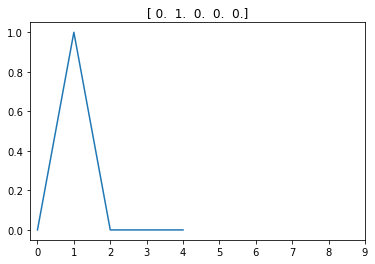

In [4]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(5));

In [24]:
X_train = np.load('x_train_minimal_128.npy')
#X_train = X_train.reshape(X_train.shape[0], 128, 128)

#for i in range(6, 9):
#    plt.subplot(330 + (i+1))
#    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
#    plt.title(y_train[i]);

In [25]:
#expand 1 more dimention as 1 for colour channel gray
X_train.shape

(10000, 128, 128, 1)

In [26]:
X_test =  np.load('x_test_minimal_128.npy')
#X_test = X_test.reshape(X_test.shape[0], 128, 128)
X_test.shape

(2000, 128, 128, 1)

In [12]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [33]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(20, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(40, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, batch_size=50, epochs=50,verbose=1, validation_data = (X_test,y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/50
10000/10000 [==============================] - 550s - loss: 1.4314 - acc: 0.3673 - val_loss: 0.8915 - val_acc: 0.6840
Epoch 2/50
10000/10000 [==============================] - 544s - loss: 0.8748 - acc: 0.6786 - val_loss: 0.6473 - val_acc: 0.7800
Epoch 3/50
10000/10000 [==============================] - 545s - loss: 0.6868 - acc: 0.7536 - val_loss: 0.5201 - val_acc: 0.8135
Epoch 4/50
10000/10000 [==============================] - 558s - loss: 0.5692 - acc: 0.8005 - val_loss: 0.4837 - val_acc: 0.8320
Epoch 5/50
10000/10000 [==============================] - 603s - loss: 0.4936 - acc: 0.8253 - val_loss: 0.4658 - val_acc: 0.8370
Epoch 6/50
10000/10000 [==============================] - 613s - loss: 0.4137 - acc: 0.8595 - val_loss: 0.4429 - val_acc: 0.8465
Epoch 7/50
10000/10000 [==============================] - 606s - loss: 0.3555 - acc: 0.8756 - val_loss: 0.4773 - val_acc: 0.8355
Epoch 8/50
10000/10000 [========================

In [35]:
score = model.evaluate(X_test, y_test, batch_size=32)
score

2000/2000 [==============================] - 35s    


[1.0299901452064515, 0.83950000000000002]

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

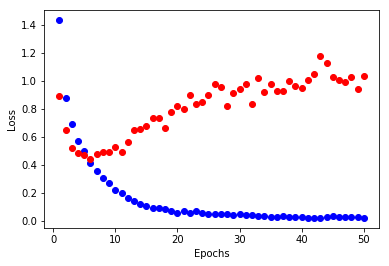

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

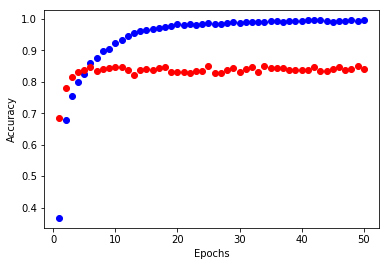

In [38]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [41]:
from keras.models import load_model
model.save('nielsen.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

RuntimeError: Unable to create link (Name already exists)

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 124, 124, 20)      520       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 20)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 58, 58, 40)        20040     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 29, 29, 40)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 33640)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              33641000  
_________________________________________________________________
dropout_17 (Dropout)         (None, 1000)              0         
__________

In [ ]:
# returns a compiled model
# identical to the previous one
model = load_model('my_nielsen.h5')